In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Caricamento del dataset
df = pd.read_excel(r"C:\Users\ebest\Desktop\df_gpp_lavoratori_xlsx.xlsx", sheet_name='Sheet1')
df['numero_lavoratori'] = pd.to_numeric(df['numero_lavoratori'], errors='coerce')

# Lista dei GGP unici (Grandi Gruppi Professionali)
ggp_unici = sorted(df['ggp'].dropna().unique())

# Funzione interattiva
def aggiorna_ggp(gpp_scelto):
    dati = df[df['ggp'] == gpp_scelto]
    
    if dati.empty:
        print("Nessun dato disponibile per il GGP selezionato.")
        return

    grouped = dati.groupby('genere')['numero_lavoratori'].sum()
    totale = grouped.sum()
    percentuali = (grouped / totale * 100).round(2)

    colors = {'F': '#006400', 'M': '#640000'}
    percentuali.plot(kind='bar', color=[colors.get(gen, '#999') for gen in percentuali.index], figsize=(6,4))

    plt.title(f"Distribuzione % maschi e femmine\n{gpp_scelto}", fontsize=14, weight='bold')
    plt.ylabel("Percentuale", fontsize=12)
    plt.ylim(0, 100)
    plt.xticks(rotation=0, fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for i, v in enumerate(percentuali):
        plt.text(i, v + 2, f'{v}%', ha='center', fontsize=11)
    
    plt.tight_layout()
    plt.show()

# Widget per selezionare GGP
interact(
    aggiorna_ggp,
    gpp_scelto=widgets.Dropdown(options=ggp_unici, description='GGP:')
)


interactive(children=(Dropdown(description='GGP:', options=('ARTIGIANI, OPERAI SPECIALIZZATI E AGRICOLTORI', '…

<function __main__.aggiorna_ggp(gpp_scelto)>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Caricamento dati
df = pd.read_excel(r"C:\Users\ebest\Desktop\df_gpp_lavoratori_xlsx.xlsx", sheet_name='Sheet1')
df['numero_lavoratori'] = pd.to_numeric(df['numero_lavoratori'], errors='coerce')

# Lista regioni
regioni = ['Tutta Italia'] + sorted(df['regione'].dropna().unique())

# Funzione per disegnare il trend della femminilizzazione
def trend_femminilizzazione(regione):
    dati = df.copy()
    
    if regione != 'Tutta Italia':
        dati = dati[dati['regione'] == regione]
    
    grouped = dati.groupby(['anno', 'genere'])['numero_lavoratori'].sum().reset_index()
    pivot = grouped.pivot(index='anno', columns='genere', values='numero_lavoratori').fillna(0)
    
    if 'F' not in pivot.columns or 'M' not in pivot.columns or pivot.empty:
        print("Dati insufficienti per il grafico selezionato.")
        return
    
    pivot['Percentuale_F'] = (pivot['F'] / (pivot['F'] + pivot['M'])) * 100

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(pivot.index, pivot['Percentuale_F'], marker='o', color='#006400')
    plt.title(f"Trend femminilizzazione - {regione}", fontsize=15, weight='bold')
    plt.ylabel("Percentuale di donne (%)", fontsize=12)
    plt.xlabel("Anno", fontsize=12)
    plt.ylim(30, 60)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Widget interattivo
interact(
    trend_femminilizzazione,
    regione=widgets.Dropdown(options=regioni, description='Regione:')
)



interactive(children=(Dropdown(description='Regione:', options=('Tutta Italia', 'Abruzzo', 'Calabria', 'Campan…

<function __main__.trend_femminilizzazione(regione)>

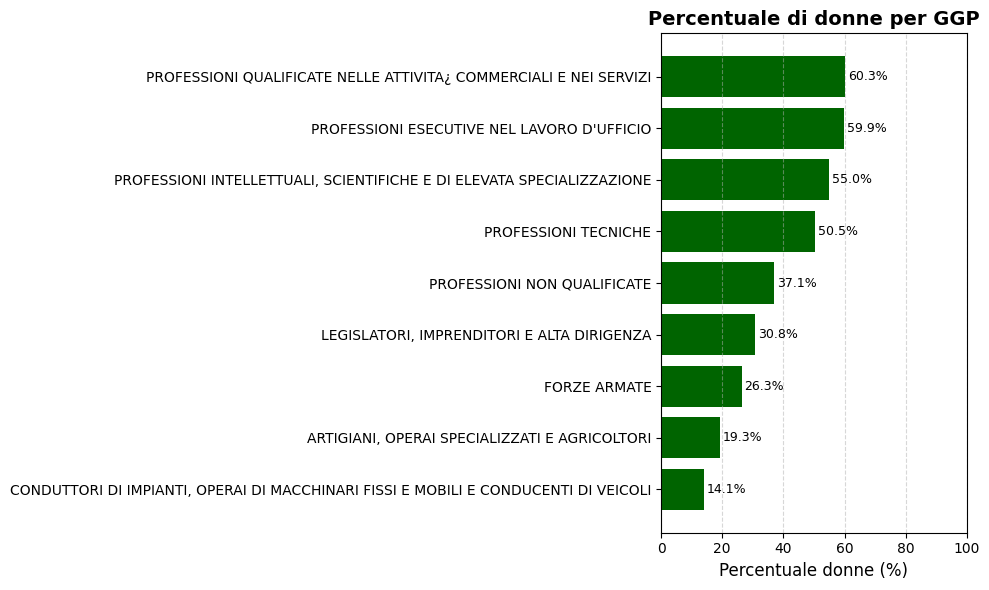

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dati
df = pd.read_excel(r"C:\Users\ebest\Desktop\df_gpp_lavoratori_xlsx.xlsx", sheet_name='Sheet1')
df['numero_lavoratori'] = pd.to_numeric(df['numero_lavoratori'], errors='coerce')

# Raggruppamento per GGP e genere
grouped = df.groupby(['ggp', 'genere'])['numero_lavoratori'].sum().reset_index()

# Pivot e calcolo % femminile
pivot = grouped.pivot(index='ggp', columns='genere', values='numero_lavoratori').fillna(0)
pivot['Percentuale_F'] = (pivot['F'] / (pivot['F'] + pivot['M']) * 100).round(2)

# Ordinamento crescente
pivot_sorted = pivot.sort_values(by='Percentuale_F', ascending=True)

# Plot a barre orizzontali
plt.figure(figsize=(10, 6))
bars = plt.barh(pivot_sorted.index, pivot_sorted['Percentuale_F'], color='#006400')

# Etichette sulle barre
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.1f}%", va='center', fontsize=9)

plt.title("Percentuale di donne per GGP", fontsize=14, weight='bold')
plt.xlabel("Percentuale donne (%)", fontsize=12)
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

import warnings
warnings.filterwarnings('ignore')


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Caricamento dati
df = pd.read_excel(r"C:\Users\ebest\Desktop\df_gpp_lavoratori_xlsx.xlsx", sheet_name='Sheet1')
df['numero_lavoratori'] = pd.to_numeric(df['numero_lavoratori'], errors='coerce')

# Lista regioni
regioni = ['Tutta Italia'] + sorted(df['regione'].dropna().unique())

# Funzione interattiva corretta
def analizza_manifatturiero(regione):
    # Filtro solo settore manifatturiero esatto
    dati = df[df['descrizione_settore'] == "ATTIVITÀ MANIFATTURIERE"].copy()

    if regione != 'Tutta Italia':
        dati = dati[dati['regione'] == regione]

    if dati.empty:
        print("Nessun dato disponibile per i filtri selezionati.")
        return

    grouped = dati.groupby('genere')['numero_lavoratori'].sum()
    totale = grouped.sum()
    percentuali = (grouped / totale * 100).round(2)

    # Plot
    colors = {'F': '#006400', 'M': '#640000'}
    percentuali.plot(kind='bar', color=[colors.get(gen, '#999') for gen in percentuali.index], figsize=(6,4))

    plt.title(f"Occupazione M/F nel settore manifatturiero\n({regione})", fontsize=14, weight='bold')
    plt.ylabel("Percentuale", fontsize=12)
    plt.ylim(0, 100)
    plt.xticks(rotation=0, fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for i, v in enumerate(percentuali):
        plt.text(i, v + 2, f'{v}%', ha='center', fontsize=11)

    plt.tight_layout()
    plt.show()

# Interfaccia interattiva
interact(
    analizza_manifatturiero,
    regione=widgets.Dropdown(options=regioni, description='Regione:')
)




interactive(children=(Dropdown(description='Regione:', options=('Tutta Italia', 'Abruzzo', 'Calabria', 'Campan…

<function __main__.analizza_manifatturiero(regione)>

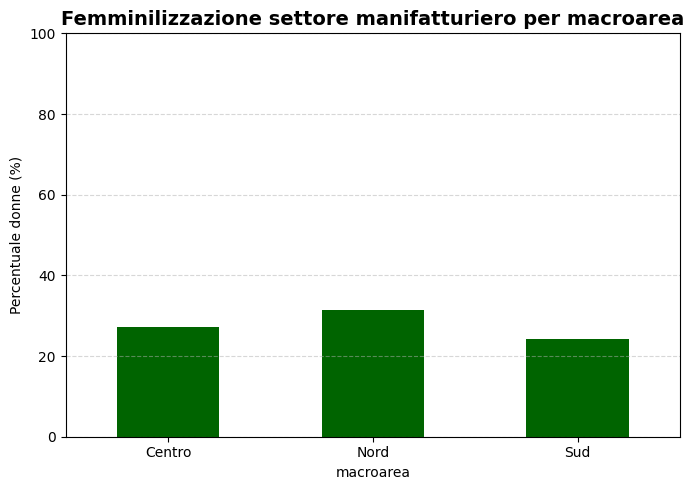

🔝 Top 10 regioni con più donne nel settore manifatturiero:


genere,Percentuale_F
regione,
Veneto,40.06
Toscana,35.63
Piemonte,34.54
Lombardia,32.60
Friuli-Venezia Giulia,32.43
Abruzzo,30.97
Emilia-Romagna,28.11
Sardegna,27.50
Marche,25.40


In [16]:
# Mappa delle macro-aree
mappa_zone = {
    'Piemonte': 'Nord', 'Valle d\'Aosta': 'Nord', 'Lombardia': 'Nord', 'Veneto': 'Nord',
    'Trentino-Alto Adige': 'Nord', 'Friuli-Venezia Giulia': 'Nord', 'Liguria': 'Nord',
    'Emilia-Romagna': 'Nord',
    'Toscana': 'Centro', 'Umbria': 'Centro', 'Marche': 'Centro', 'Lazio': 'Centro',
    'Abruzzo': 'Sud', 'Molise': 'Sud', 'Campania': 'Sud', 'Puglia': 'Sud',
    'Basilicata': 'Sud', 'Calabria': 'Sud', 'Sicilia': 'Sud', 'Sardegna': 'Sud'
}

df['macroarea'] = df['regione'].map(mappa_zone)

# Filtro solo manifatturiero
df_mani = df[df['descrizione_settore'] == "ATTIVITÀ MANIFATTURIERE"].copy()

# 1️⃣ Distribuzione % M/F per macroarea
macro = df_mani.groupby(['macroarea', 'genere'])['numero_lavoratori'].sum().reset_index()
pivot_macro = macro.pivot(index='macroarea', columns='genere', values='numero_lavoratori').fillna(0)
pivot_macro['Percentuale_F'] = (pivot_macro['F'] / (pivot_macro['F'] + pivot_macro['M']) * 100).round(2)

# Plot
pivot_macro['Percentuale_F'].plot(kind='bar', color='#006400', figsize=(7, 5))
plt.title("Femminilizzazione settore manifatturiero per macroarea", fontsize=14, weight='bold')
plt.ylabel("Percentuale donne (%)")
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2️⃣ Top 10 regioni per % di donne nel manifatturiero
regionale = df_mani.groupby(['regione', 'genere'])['numero_lavoratori'].sum().reset_index()
pivot_reg = regionale.pivot(index='regione', columns='genere', values='numero_lavoratori').fillna(0)
pivot_reg['Percentuale_F'] = (pivot_reg['F'] / (pivot_reg['F'] + pivot_reg['M']) * 100).round(2)
top10 = pivot_reg.sort_values(by='Percentuale_F', ascending=False)[['Percentuale_F']].head(10)

# Mostra tabella
print("🔝 Top 10 regioni con più donne nel settore manifatturiero:")
display(top10)


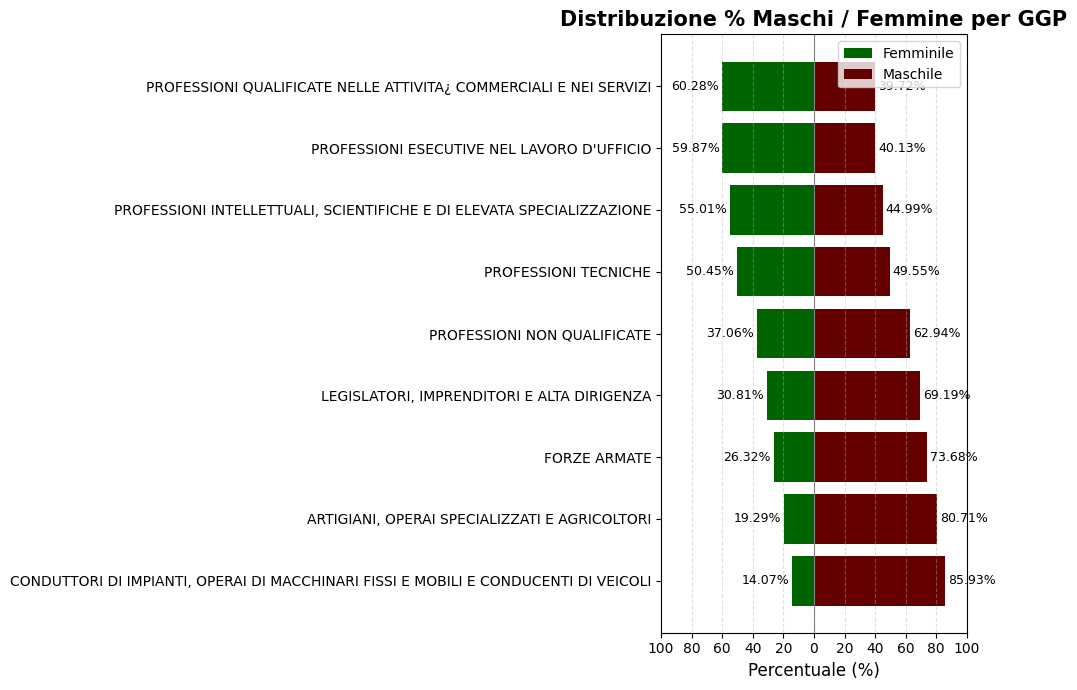

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Nessun warning!
warnings.filterwarnings('ignore')

# Caricamento dati
df = pd.read_excel(r"C:\Users\ebest\Desktop\df_gpp_lavoratori_xlsx.xlsx", sheet_name='Sheet1')
df['numero_lavoratori'] = pd.to_numeric(df['numero_lavoratori'], errors='coerce')

# Raggruppamento per GGP e genere
grouped = df.groupby(['ggp', 'genere'])['numero_lavoratori'].sum().reset_index()
pivot = grouped.pivot(index='ggp', columns='genere', values='numero_lavoratori').fillna(0)

# Calcolo percentuali
pivot['Totale'] = pivot['F'] + pivot['M']
pivot['% F'] = (pivot['F'] / pivot['Totale'] * 100).round(2)
pivot['% M'] = (pivot['M'] / pivot['Totale'] * 100).round(2)
pivot = pivot.sort_values(by='% F', ascending=True)

# Colori
verde_oscuro = '#006400'
rosso_unghie_erika_con_ricrescita = '#640000'

# Plot
plt.figure(figsize=(10, 7))
ggp = pivot.index
plt.barh(ggp, -pivot['% F'], color=rosa_pastello, label='Femminile')
plt.barh(ggp, pivot['% M'], color=verde_scuro, label='Maschile')

# Stile e dettagli
plt.axvline(0, color='grey', linewidth=0.8)
plt.title("Distribuzione % Maschi / Femmine per GGP", fontsize=15, weight='bold')
plt.xlabel("Percentuale (%)", fontsize=12)
plt.xticks(range(-100, 101, 20), [abs(x) for x in range(-100, 101, 20)])
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend(loc='upper right')
plt.tight_layout()

# Etichette su barre
for i in range(len(pivot)):
    plt.text(-pivot['% F'].iloc[i] - 2, i, f"{pivot['% F'].iloc[i]}%", va='center', ha='right', fontsize=9)
    plt.text(pivot['% M'].iloc[i] + 2, i, f"{pivot['% M'].iloc[i]}%", va='center', ha='left', fontsize=9)

plt.show()
